# PROYECT PERCY UNIVERSIDAD.CSV

In [2]:
import os #Sistema operativo
import pandas as pd #Analisis de datos de alto rendimiento
import matplotlib.pyplot as plt #Creacion de graficos en este caso.
import seaborn as sns #Generar visualizaciones de datos

from sklearn.cluster import KMeans #Algoritmo de Clustering -> Realizar cluteres de conjunto de datos
from sklearn.preprocessing import StandardScaler #Estandarizar caracteristicas numericas para que tendra un valor aproximado a cero.
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score #Matriz de confusión y metricas como presición, recall y f1-score.
from sklearn.decomposition import PCA #Analisis de Componentes principales (PCA), tecnica que permite reducir su dimensionalidad.

import numpy as np #Soporte a metricas y operaciones matematicas de alto rendimiento.

import statsmodels.api as sm #pip install statsmodels -> Proporciona modelos estadisticos y herramientas para analisis de datos e inferencias
from sklearn.model_selection import train_test_split #Dividir conjunto de datos en subconjuntos para entrenamiento y prueba
from sklearn.linear_model import LinearRegression #Modelo de Regresion Lineal

In [3]:
filelist  = []

csv_university="C:/dataset/EF_Big data"
for dirname, _, filenames in os.walk(csv_university):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/dataset/EF_Big data\Advertising.csv
C:/dataset/EF_Big data\Advertising.ipynb
C:/dataset/EF_Big data\CarPrice_Assignment.csv
C:/dataset/EF_Big data\Country-data.csv
C:/dataset/EF_Big data\EF - Parte practica.xlsx
C:/dataset/EF_Big data\Practice_Case_Study_Clustering.ipynb
C:/dataset/EF_Big data\universidades.csv


In [4]:
df=pd.read_csv('C:/dataset/EF_Big data/universidades.csv')
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
df.dtypes

private         object
apps             int64
accept           int64
enroll           int64
top10perc        int64
top25perc        int64
f_undergrad      int64
p_undergrad      int64
outstate         int64
room_board       int64
books            int64
personal         int64
phd              int64
terminal         int64
s_f_ratio      float64
perc_alumni      int64
expend           int64
grad_rate        int64
dtype: object

In [6]:
df.isnull().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

# Exploración de Datos (Tiene como finalidad ver si hay datos erroneos)

## Grafico de Barras para saber la cantidad de universidad privadas y no privadas

<Axes: xlabel='private', ylabel='count'>

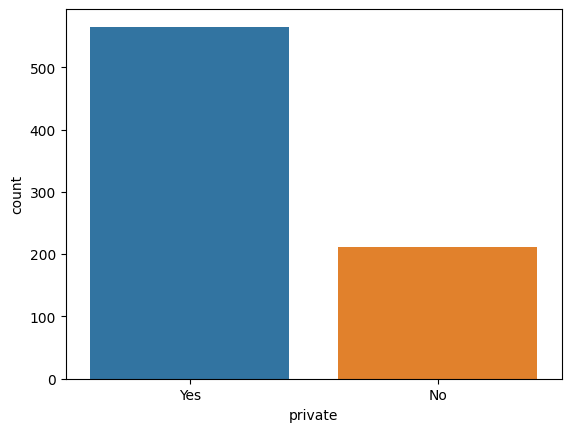

In [7]:
sns.countplot(data=df, x='private')

## Grafico de Dispersión para buscar la relacion entre Room_board (Alojamiento y comida) y Grad_rate (Tasa de Graduación) y private cumple como categoria (Yes or No)

<Axes: xlabel='room_board', ylabel='grad_rate'>

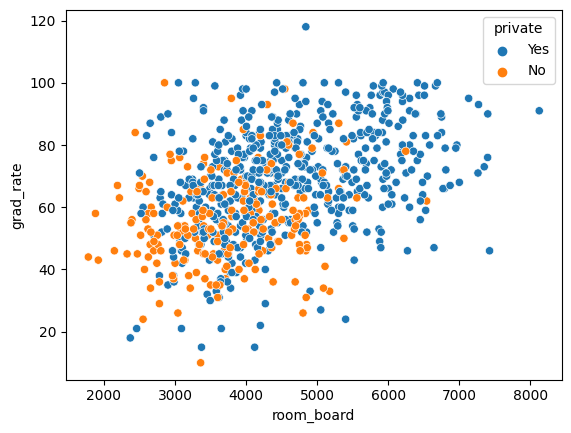

In [8]:
sns.scatterplot(x='room_board', y='grad_rate', data=df, hue='private')

## Outstate (Matricula promedio fuera del estado) y f_undergrad (Estudiante de pre-grado a tiempo completo)

<Axes: xlabel='outstate', ylabel='f_undergrad'>

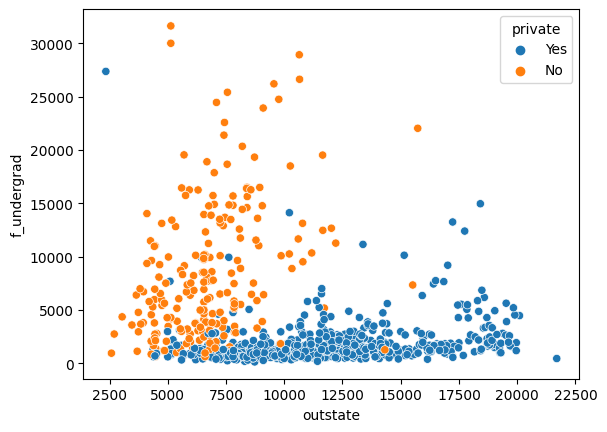

In [9]:

sns.scatterplot(x='outstate', y='f_undergrad', data=df, hue='private')

## Outstate (Matricula promedio fuera del estado) entre los colegios privados y los que no.

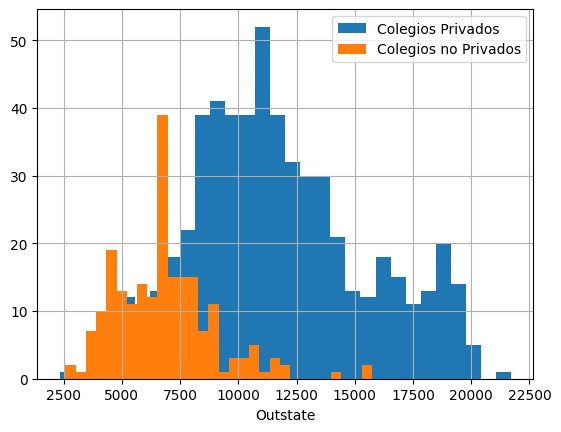

In [10]:
df.loc[df.private == 'Yes', 'outstate'].hist(label="Colegios Privados", bins=30)
df.loc[df.private == 'No', 'outstate'].hist(label="Colegios no Privados", bins=30)

plt.xlabel('Outstate')
plt.legend()

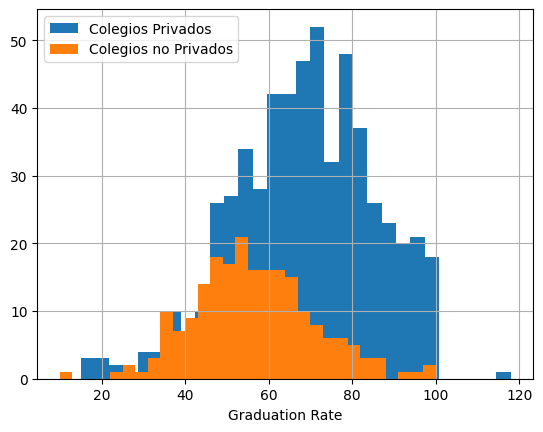

In [11]:
df.loc[df.private == 'Yes', 'grad_rate'].hist(label="Colegios Privados", bins=30)
df.loc[df.private == 'No', 'grad_rate'].hist(label="Colegios no Privados", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

#### El grafico nos muestra que hay una escuela privada con un indice de graduación mayor al 100%

In [12]:
df.loc[df.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


### Asi que cambiamos el dato a que en caso de que haya un dato de la variable grad_rate mayor al 100% se establesca en 100%

In [13]:
df.loc[df.grad_rate > 100, 'grad_rate'] = 100

### Verificamos que ya no aparezca ese error de datos 

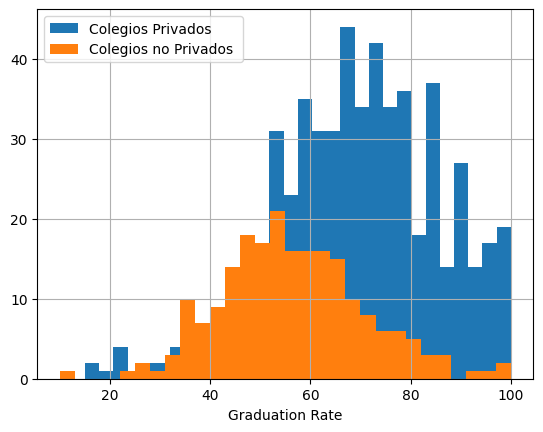

In [14]:
df.loc[df.private == 'Yes', 'grad_rate'].hist(label="Colegios Privados", bins=30)
df.loc[df.private == 'No', 'grad_rate'].hist(label="Colegios no Privados ", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

## Crear una variable X que contenga las columnas del Dataframe excepto la columna "private" 

In [15]:
X = df.drop(['private'],axis=1) # el axis=1 es para indicar que se elimine las columnas (axis=0 es las filas)

## Creamos otra variable donde se almacena los datos de la columna "private"

In [16]:
#y = df.private

# Modelo de codo para obtener el numero óptimo de clusters en un algoritmo de Clustering K-Means

The innertia for : 1 Clusters is: 13209.0
The innertia for : 2 Clusters is: 10467.616632653844
The innertia for : 3 Clusters is: 8251.89155019964
The innertia for : 4 Clusters is: 7440.597662225892
The innertia for : 5 Clusters is: 6845.747193924872
The innertia for : 6 Clusters is: 6505.977291110127
The innertia for : 7 Clusters is: 6221.513535971005


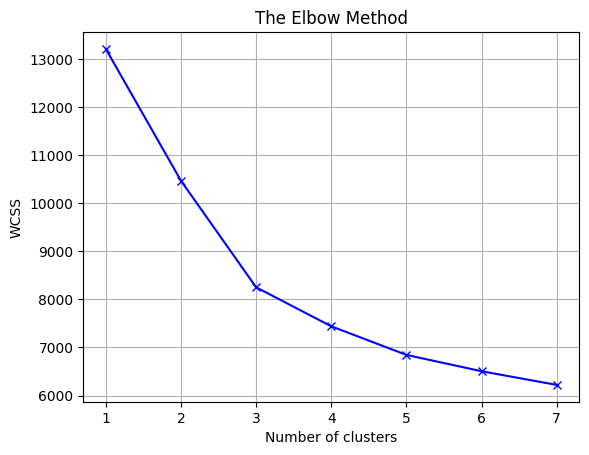

In [17]:
scaler= StandardScaler() #Creamos la instancia del modelo
X_normalized= scaler.fit_transform(X) # El mejor metodo de normalizacion para K-means (Obtiene valor media cero y varianza unitaria)

wcss = []
inertia = [] #Creamos dos listas vacias donde se almacenan los valores dentro del Cluster y la inercia
    
for i in range(1, 8):
    kmeans_i = KMeans(n_clusters = i, init = 'k-means++', n_init=7, random_state = 42) #Se crea el algoritmo de Clustering
    kmeans_i.fit(X_normalized) #Ajustar el metodo de K-Means a los datos especificados
    wcss.append(kmeans_i.inertia_) #Usa una formula de la suma de los cuadrados dentro del cluster y se agrega al valor WCSS
    u = kmeans_i.inertia_
    inertia.append(u) #Agregamos el valor de la inercia del modelo 
    print("The innertia for :", i, "Clusters is:", u) #
    
plt.plot(range(1, 8), wcss,"bx-") #Creacion de un grafico de lineas con el numero de clusteres en el eje x y los valores de WCSS
plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #Titulos y encabezados del grafico
plt.show()

In [18]:
kmeans_2 = KMeans(2,n_init=10) #Crear una instancia usando 2 clusteres (se agrupa en 2 clusteres especificos)
#el n_init ejecuta el algoritmo en diferentes centroide

In [19]:
kmeans_2.fit(X)

KMeans(n_clusters=2, n_init=10)

In [20]:
kmeans_2.cluster_centers_ #Accedemos a los centroides


array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

### Para poder tener una mejor visualizacion el valor string (private) se tranforma a valor categorico (1 -> Yes o 0 -> No) 

In [21]:
df['private'] = df.private.astype("category").cat.codes # el cat.codes convierte el valor el numerico

In [22]:
df.private #Se muestra los valores del private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: private, Length: 777, dtype: int8

In [23]:
df.head() # muestra el dataFrame ya clasificado

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [24]:
kmeans_2.labels_ #Ver las etiquetas de los clusteres

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
print(confusion_matrix(df.private, kmeans_2.labels_)) 
#74 es los verdaderos negativos
# 138 es los falsos positivos
#34 es falsos negativos
#531 es verdaderos positivos
print(classification_report(df.private, kmeans_2.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [26]:
kmeans_3 = KMeans(3,n_init=10)
kmeans_3.fit(X)

KMeans(n_clusters=3, n_init=10)

In [27]:
kmeans_3.cluster_centers_

array([[1.70182301e+03, 1.23653451e+03, 4.91520354e+02, 2.18194690e+01,
        4.97769912e+01, 2.22618053e+03, 6.56030088e+02, 9.28193982e+03,
        4.14370619e+03, 5.37015929e+02, 1.32979646e+03, 6.75787611e+01,
        7.51433628e+01, 1.46362832e+01, 2.09274336e+01, 7.83074690e+03,
        6.27752212e+01],
       [1.06216145e+04, 7.30063855e+03, 2.93942169e+03, 3.20000000e+01,
        6.34698795e+01, 1.54825060e+04, 3.17455422e+03, 8.23585542e+03,
        4.13487952e+03, 5.94349398e+02, 1.88833735e+03, 8.41566265e+01,
        8.95542169e+01, 1.64072289e+01, 1.58072289e+01, 9.44095181e+03,
        6.05060241e+01],
       [3.79185271e+03, 2.04663566e+03, 6.53937984e+02, 4.98372093e+01,
        7.72248062e+01, 2.57355039e+03, 2.35829457e+02, 1.69343256e+04,
        5.43727907e+03, 5.74604651e+02, 1.03575194e+03, 8.75193798e+01,
        9.33333333e+01, 1.02046512e+01, 3.51627907e+01, 1.78138140e+04,
        8.02868217e+01]])

In [28]:
df['private'] = df.private.astype("category").cat.codes

In [29]:
df.private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: private, Length: 777, dtype: int8

In [30]:
kmeans_3.labels_

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,

In [31]:
confusion_mat=confusion_matrix(df.private, kmeans_3.labels_)
confusion_mat[np.isnan(confusion_mat)] = 0
print(confusion_mat)
'''
class_report=classification_report(df.private, kmeans_3.labels_)
class_report[np.isnan(class_report)] = 0
print(class_report)'''

[[135  76   1]
 [430   7 128]
 [  0   0   0]]


'\nclass_report=classification_report(df.private, kmeans_3.labels_)\nclass_report[np.isnan(class_report)] = 0\nprint(class_report)'

In [32]:
precision = precision_score(df.private, kmeans_3.labels_, average=None, zero_division=0)
recall = recall_score(df.private, kmeans_3.labels_, average=None,zero_division=0)
f1 = f1_score(df.private, kmeans_3.labels_, average=None)
class_report = ''
for i in range(len(precision)):
    class_report += f"Cluster {i}:\n"
    class_report += f"  Precision: {precision[i]}\n"
    class_report += f"  Recall: {recall[i]}\n"
    class_report += f"  F1-score: {f1[i]}\n"
    class_report += "\n"
print(class_report)

Cluster 0:
  Precision: 0.23893805309734514
  Recall: 0.6367924528301887
  F1-score: 0.34749034749034746

Cluster 1:
  Precision: 0.08433734939759036
  Recall: 0.012389380530973451
  F1-score: 0.021604938271604937

Cluster 2:
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0




# En pocas palabras el "Clustering" solo clasifica las muestras buscando una similitud por eso para tareas de clasificación no es apropiado.

## NOTA: K-Means (No Supervisado) no es un algoritmo de clasificación, sino un algoritmo de clustering 

# Metodo PCA (Principal Component Analysis)

## Creamos otro dataframe donde contenemos los datos normalidados menos private 

In [33]:
dfx = pd.DataFrame(data=X_normalized, columns=df.columns[1:])
dfx.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,777.000000,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
mean,3.657878e-17,5.486816e-17,-5.486816e-17,-4.115112e-17,-1.554598e-16,1.828939e-17,0.000000,1.554598e-16,3.474984e-16,-1.760354e-16,4.572347e-17,4.572347e-17,-4.115112e-16,-6.401286e-17,9.144694e-18,1.325981e-16,-2.469067e-16
std,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00
min,-7.551337e-01,-7.947645e-01,-8.022728e-01,-1.506526e+00,-2.364419e+00,-7.346169e-01,-0.561502,-2.014878e+00,-2.351778e+00,-2.747779e+00,-1.611860e+00,-3.962596e+00,-3.785982e+00,-2.929799e+00,-1.836580e+00,-1.240641e+00,-3.240639e+00
25%,-5.754408e-01,-5.775805e-01,-5.793514e-01,-7.123803e-01,-7.476067e-01,-5.586426e-01,-0.499719,-7.762035e-01,-6.939170e-01,-4.810994e-01,-7.251203e-01,-6.532948e-01,-5.915023e-01,-6.546598e-01,-7.868237e-01,-5.574826e-01,-7.271634e-01
50%,-3.732540e-01,-3.710108e-01,-3.725836e-01,-2.585828e-01,-9.077663e-02,-4.111378e-01,-0.330144,-1.120949e-01,-1.437297e-01,-2.992802e-01,-2.078552e-01,1.433889e-01,1.561419e-01,-1.237939e-01,-1.408197e-01,-2.458933e-01,-2.572831e-02
75%,1.609122e-01,1.654173e-01,1.314128e-01,4.221134e-01,6.671042e-01,6.294077e-02,0.073418,6.179271e-01,6.318245e-01,3.067838e-01,5.310950e-01,7.562224e-01,8.358184e-01,6.093067e-01,6.666852e-01,2.241735e-01,7.341597e-01
max,1.165867e+01,9.924816e+00,6.043678e+00,3.882319e+00,2.233391e+00,5.764674e+00,13.789921,2.800531e+00,3.436593e+00,1.085230e+01,8.068387e+00,1.859323e+00,1.379560e+00,6.499390e+00,3.331452e+00,8.924721e+00,2.020124e+00


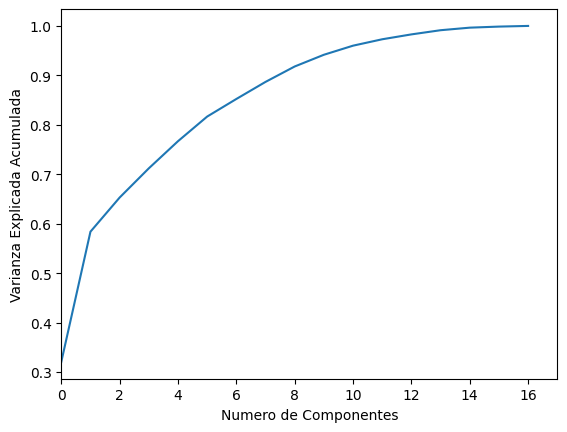

In [34]:
pca=PCA() #Declaro una variable que contenga el metodo PCA
dfx_pca = pca.fit(dfx) #Calcula la matriz que describe las relaciones entre las variables originales
plt.plot(np.cumsum(dfx_pca.explained_variance_ratio_)) #Traza la varianza explicada acumulativa en función del número de componentes principales
plt.xlim(left=0, right=17) #Establecer limites
plt.xlabel('Numero de Componentes')
plt.ylabel('Varianza Explicada Acumulada')

pca_sklearn = PCA(n_components=16) #Establecemos el PCA con 16 componentes
Y_sklearn = pca_sklearn.fit_transform(dfx) #Se tranforma usando composiciones lineales para capturar la varianza

In [35]:
print(Y_sklearn)

[[-1.59346504e+00  7.64437705e-01 -1.07421906e-01 ...  1.80788550e-01
   1.64977843e-03 -9.34384833e-02]
 [-2.19266226e+00 -5.81414120e-01  2.29867011e+00 ... -7.44223371e-01
   1.03894126e-01 -4.97434983e-02]
 [-1.43023204e+00 -1.09470724e+00 -4.34916262e-01 ...  2.24962835e-01
  -2.23208963e-02 -3.38494006e-03]
 ...
 [-7.34072793e-01 -7.78216097e-02  9.12940911e-05 ... -4.31930570e-02
   6.81840328e-02 -2.31211062e-01]
 [ 7.92380960e+00 -2.05664756e+00  2.07877587e+00 ... -7.18073577e-02
   3.53339085e-01  3.03754370e-01]
 [-4.64915192e-01  3.63862232e-01 -1.33139320e+00 ... -9.58433583e-02
  -1.15579562e-01 -1.19010125e-01]]


In [36]:
variance_explained = pca_sklearn.explained_variance_ratio_ * 100
print("Varianza explicada por cada componente principal (en %):")
print(variance_explained)

Varianza explicada por cada componente principal (en %):
[32.04207963 26.34285075  6.90127812  5.90822261  5.48891594  4.98308519
  3.55727269  3.45363127  3.11700991  2.37049155  1.84035923  1.29533431
  0.98594769  0.84543207  0.51711988  0.2157262 ]


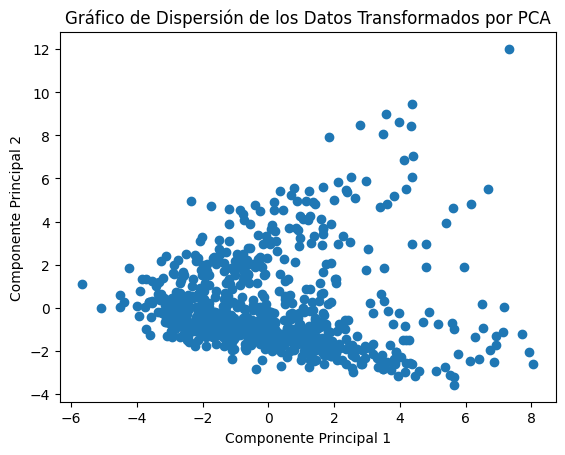

In [63]:
x_g = Y_sklearn[:, 0]
y_g = Y_sklearn[:, 1]
plt.scatter(x_g, y_g)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de Dispersión de los Datos Transformados por PCA')
plt.show()

In [35]:
Y_sklearn.shape

(777, 16)

### En pocas palabras el PCA: Se utiliza para eliminar las características redundantes de los conjuntos de datos sin perder mucha información

# RL (Regresion Lineal)

## Creamos otro dataframe para la RL ya que en este caso vamos a dropear la variable "grad_rate"

In [52]:
df_filtered = df[df['private'] != '1'] #DataFrame con nombre df_filtered que contenga la variable private, pero solo los que tienen valor 0
X = df_filtered.drop(columns="private", axis=1) #Crear variable X que contiene todo menos la variable private.

y_RL = df_filtered["grad_rate"] #crear variable y_RL que contiene la columna grad_rate del Dataframe "df_filtered" (Variable Dependiente)

X_1 = sm.add_constant(X) #Agregar una constante que es importante para metodos de Regresion Simple o Logistica
print(df_filtered.columns) #Imprimir todas las columnas del dataframe (solo visualizar)

Index(['private', 'apps', 'accept', 'enroll', 'top10perc', 'top25perc',
       'f_undergrad', 'p_undergrad', 'outstate', 'room_board', 'books',
       'personal', 'phd', 'terminal', 's_f_ratio', 'perc_alumni', 'expend',
       'grad_rate'],
      dtype='object')


In [53]:
model = sm.OLS(y_RL,X_1).fit() #Creamos el modelo de regresion lineal ordinaria (OLS)
model.pvalues #Ajustar los valores (Si la variable es mas baja significa una variable que no tiene un efecto sobre la variable dependiente)

const          8.244497e-01
apps           8.197907e-05
accept         1.337509e-01
enroll         4.899104e-01
top10perc      9.546932e-01
top25perc      6.929929e-01
f_undergrad    1.719245e-02
p_undergrad    1.761537e-02
outstate       3.859811e-01
room_board     3.024655e-04
books          9.704617e-01
personal       7.528198e-16
phd            9.361181e-01
terminal       6.749091e-01
s_f_ratio      8.130965e-01
perc_alumni    6.096634e-01
expend         4.214659e-14
grad_rate      0.000000e+00
dtype: float64

In [44]:
#Backward Elimination
cols = list(X.columns) # crear una lista que contiene las columnas del Dataframe
pmax = 1 # PAra indicar el valor maximo de p
while len(cols)>0: #cols sea mayor que 0
    p= [] #Almacenar cada iteracion
    X_1 = sm.add_constant(X[cols]) #Agregar una columna constante que es para ajustarlo al modelo de RL
    model = sm.OLS(y_RL,X_1).fit() #Ajusta el modelo de RL Ordinaria del dataframe y la variable y_RL
    p = pd.Series(model.pvalues.values[1:],index = cols) #not idexing the constant column     
    pmax = max(p) #Encontrar el valor maximo de p
    feature_with_p_max = p.idxmax() #Obtener el valor mas alta de la caracteristica
    if(pmax>0.05): #Significa que es una caracteristica no significativa
        cols.remove(feature_with_p_max) #Se eliminan
    else:
        break #se rompe y las restantes son caracteristicas significativas
selected_features_BE = cols #Asignar a la variable cols
print(selected_features_BE)

['apps', 'accept', 'enroll', 'f_undergrad', 'p_undergrad', 'room_board', 'personal', 'expend', 'grad_rate']


In [45]:
index_selected_features_BE = [] #Almacenar indices de las columnas
for col in X[selected_features_BE]: #Obtenemos la columna del dataframe original
    index_selected_features_BE.append(X.columns.get_loc(col)) # se agrega a la lista "index_selected_features_BE"

In [48]:
df_filtered[selected_features_BE]

,apps,accept,enroll,f_undergrad,p_undergrad,room_board,personal,expend,grad_rate
0,1660,1232,721,2885,537,3300,2200,7041,60
1,2186,1924,512,2683,1227,6450,1500,10527,56
2,1428,1097,336,1036,99,3750,1165,8735,54
3,417,349,137,510,63,5450,875,19016,59
4,193,146,55,249,869,4120,1500,10922,15
...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,3089,2029,3900,1200,4469,40
773,1959,1805,695,2849,1107,4960,1250,9189,83
774,2097,1915,695,2793,166,4200,781,8323,49
775,10705,2453,1317,5217,83,6510,2115,40386,99


In [50]:
x = df_filtered.loc[:, df_filtered.columns != 'grad_rate'].values #Selecciona todas las columnas excepto 'grad_rate'
y = df_filtered.loc[:, 'grad_rate'].values #Selecciona todas las filas del dataframe y solo la columna 'grad_late'

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(x[:,index_selected_features_BE], y, test_size = 0.8, random_state = 0)

## Nornmalizacion basada en Shapiro-Wilk

In [54]:
scaler = StandardScaler()
X_train[:,:8] = scaler.fit_transform(X_train[:,:8])
X_test[:,:8] = scaler.transform(X_test[:,:8])

In [57]:
model = LinearRegression()
model.fit(X_train,Y_train)
print('Model score: '+str(model.score(X_test,Y_test)))

Model score: 0.27524765939329165
